In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [30]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

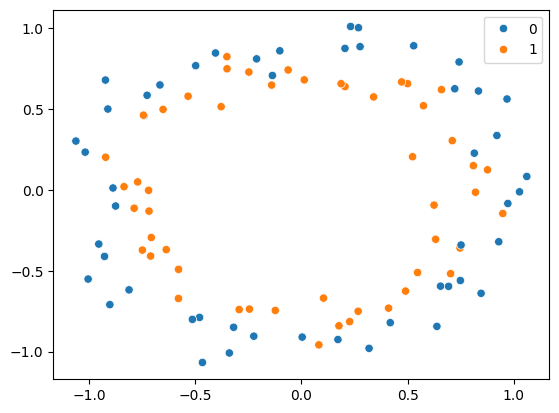

In [6]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [9]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, verbose=1)

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8687 - loss: 0.5169 - val_accuracy: 0.7000 - val_loss: 0.6310
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8492 - loss: 0.5332 - val_accuracy: 0.6500 - val_loss: 0.6331
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8703 - loss: 0.5201 - val_accuracy: 0.6500 - val_loss: 0.6332
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8289 - loss: 0.5334 - val_accuracy: 0.6500 - val_loss: 0.6337
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8586 - loss: 0.5130 - val_accuracy: 0.6500 - val_loss: 0.6315
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8547 - loss: 0.5146 - val_accuracy: 0.6500 - val_loss: 0.6305
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8070 - loss: 0.5155 - val_accuracy: 0.6500 - val_loss: 0.6309
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8562 - loss: 0.5172 - val_accuracy: 0.7000 - val_loss

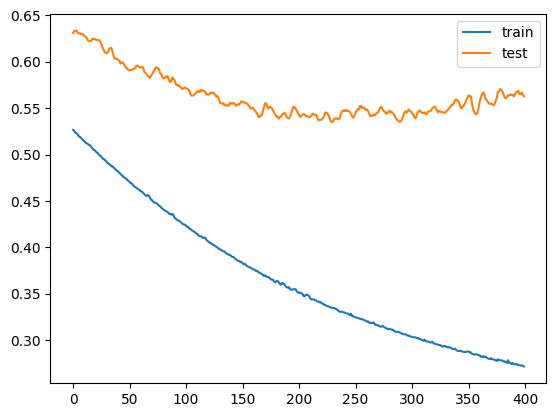

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


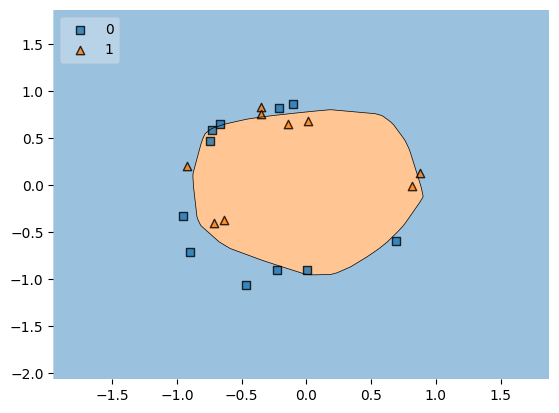

In [17]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [24]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
callback = EarlyStopping(
    monitor="val_loss", #Quantity to be monitored. Defaults to "val_loss".
    min_delta=0.00001, #Minimum change in monitored metric to qualify as an actual improvement.
    patience=20, #Number of epochs with no improvement before training is stopped.
    verbose=1, # Controls whether to display early stopping messages (0 = silent, 1 = show).
    mode="auto",#Defines improvement direction — 'min' for decreasing, 'max' for increasing, 'auto' infers from metric name.
    baseline=None,#: Minimum baseline value; training stops if no improvement beyond it is achieved
    restore_best_weights=True #If True, restores model weights from the epoch with best monitored value.
)

In [35]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.5766 - loss: 0.6571 - val_accuracy: 0.3500 - val_loss: 0.7182
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6203 - loss: 0.6585 - val_accuracy: 0.3500 - val_loss: 0.7189
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.6125 - loss: 0.6559 - val_accuracy: 0.3500 - val_loss: 0.7190
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.5984 - loss: 0.6551 - val_accuracy: 0.3500 - val_loss: 0.7188
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6219 - loss: 0.6561 - val_accuracy: 0.3500 - val_loss: 0.7182
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5734 - loss: 0.6597 - val_accuracy: 0.3500 - val_loss: 0.7158
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6047 - loss: 0.6582 - val_accuracy: 0.3500 - val_loss: 0.7138
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6047 - loss: 0.6596 - val_accuracy: 0.4000

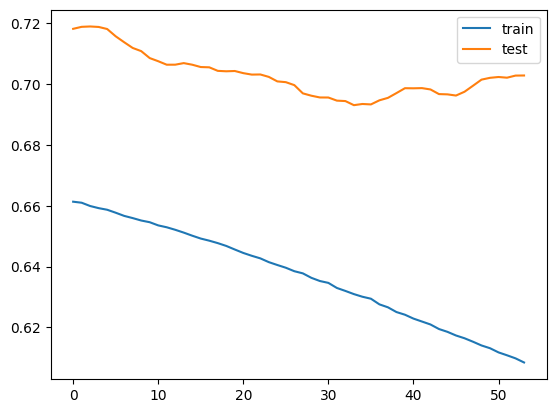

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


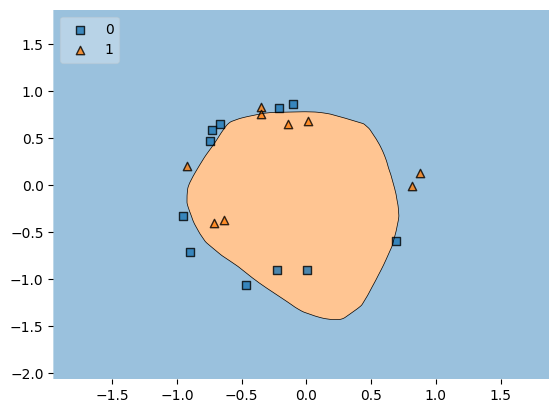

In [37]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()